In [4]:
import numpy as np
import pandas as pd
import time

In [5]:

t1 = time.time()
mnist_train_data_path = "C:/Users/1-13/Downloads/train.csv"

# 경로, 구분자, 첫번째줄 스킵, 데이터 타입
train = np.genfromtxt(mnist_train_data_path,delimiter = ',', skip_header=1).astype(np.dtype('uint8'))
t2 = time.time()

print("process Time :" +str(t2-t1))
print(train)

process Time :20.8294575214386
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [6]:

t1 = time.time()
mnist_test_data_path = "C:/Users/1-13/Downloads/test.csv"

# 경로, 구분자, 첫번째줄 스킵, 데이터 타입
test = np.genfromtxt(mnist_test_data_path,delimiter = ',', skip_header=1).astype(np.dtype('uint8'))
t2 = time.time()

print("process Time :" +str(t2-t1))
print(test)

process Time :13.459375858306885
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
print(len(test))
print(len(train))

28000
42000


In [8]:
print(test.shape)
print(train.shape)

(28000, 784)
(42000, 785)


In [9]:
# 데이터 분리 

In [67]:
train_data = train[:,1:]
train_labels = train[:,0]
# 정답지와 문제지 분리!!

In [11]:
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


In [12]:
unique, counts = np.unique(train_labels,return_counts=True)
print(np.asarray((unique,counts)).T)

[[   0 4132]
 [   1 4684]
 [   2 4177]
 [   3 4351]
 [   4 4072]
 [   5 3795]
 [   6 4137]
 [   7 4401]
 [   8 4063]
 [   9 4188]]


In [13]:
import seaborn as sns

In [14]:
# 이미 앞에서 label은 분리하였으니, 순수 데이터에서 크기 부분을 확인하자!!!
print(train_data[0].shape)
print(np.sqrt(train_data[0].shape[0]))


(784,)
28.0


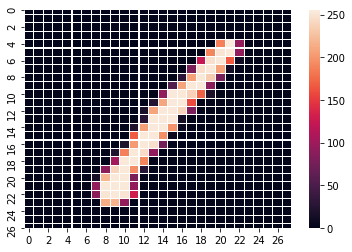

In [69]:
# 보고자 하는 데이터의 index (가로줄)
idx = 0
image_data = train_data[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값을 획득 & 이를 제곱근으로 변환
tot_size = image_data.shape[0]
one_size = int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data,(one_size,one_size)), linewidth=0.1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# 분류, 정확도, 과적합피하고자 

In [ ]:
t1 = time.time()

# 모델 세팅
# instantiate learning model(k=3)
# n_jobs= -1 하지 않으면 시간 많이 걸림
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

num_comp = 39
pca = PCA(n_components=num_comp)
pca.fit(train_data)
train_ext = pca.fit_transform(train_data)
cross_val_score(knn, train_data, train_labels, cv=10)

# 모의고사 문제 정답지 세팅
# fitting the model
knn.fit(train_ext,train_labels)

# 실전문제 테스트
# predict the response
pred = knn.predict(test_ext)

t2 = time.time()

print("Process Time :" + str(t2-t1))

In [140]:
# 출력용 만들기
img_id = []

for i in range(1,len(test)+1):
    img_id.append(i)

predMNIST = pd.DataFrame({"imageId":img_id,"Label":pred})

outPath = "C:/Users/1-13/Desktop/test4.csv"
predMNIST.to_csv(outPath,index=False)


In [139]:
accuracy_score(test_labels,pred)

0.11185714285714286

In [28]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [113]:
num_comp = 10
pca = PCA(n_components = num_comp)

In [114]:
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [115]:
np.sum(pca.explained_variance_ratio_)

0.4891680252308024

In [116]:
train_ext = pca.fit_transform(train_data)
print(train_ext.shape)


(42000, 10)


In [117]:
test_data = test[:,1:]
test_labels = test[:,0]
test_norm=min_max_scaler.fit_transform(test_data)

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
train_norm=min_max_scaler.fit_transform(train_ext)

In [119]:
train_norm

array([[0.11935244, 0.24697317, 0.55278262, ..., 0.51231933, 0.55063645,
        0.59456122],
       [0.8013839 , 0.36383766, 0.31476727, ..., 0.39609548, 0.41478693,
        0.52956058],
       [0.05432592, 0.38687739, 0.51243788, ..., 0.33888776, 0.34315393,
        0.48335204],
       ...,
       [0.40736012, 0.81595418, 0.4305282 , ..., 0.76429237, 0.45080112,
        0.54581498],
       [0.40479987, 0.50961422, 0.73144651, ..., 0.42364461, 0.35497454,
        0.43214141],
       [0.2051737 , 0.63272882, 0.51095843, ..., 0.43890494, 0.41062838,
        0.72764059]])

In [120]:
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn.fit(train_norm,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

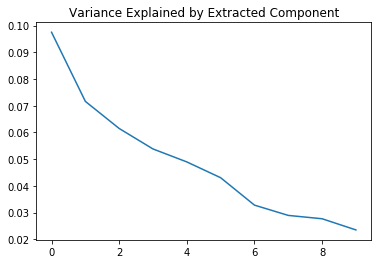

In [121]:
import matplotlib.pylab as plt
plt.plot(pca.explained_variance_ratio_)
plt.title("Variance Explained by Extracted Component")
plt.show()

In [122]:
min_max_scaler = MinMaxScaler()
train_norm=min_max_scaler.fit_transform(train_ext)


In [126]:
knn = KNeighborsClassifier()
knn.fit(train_norm,train_labels)
cross_val_score(knn, train_norm, train_labels, cv=2)
# 크로스 밸리데이션 -> 평가기능 ex) cv = 3 이면 데이터셋 3개로 나누어서 1개씩 밸리데이션으로 만들어서 평가하는것

array([0.91848784, 0.91579749])

In [162]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
min_max_scaler = MinMaxScaler()




In [163]:
num_comp = 10
pca = PCA(n_components=num_comp)
pca.fit(train_data)
train_ext = pca.fit_transform(train_data)
test_ext = pca.fit_transform(test_data)


In [165]:
train_norm=min_max_scaler.fit_transform(train_ext)
test_norm=min_max_scaler.fit_transform(test_ext)

knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn.fit(train_ext,train_labels)

pred = knn.predict(test_ext)
accuracy_score(test_labels,pred)

0.11225